<h1><center>House Prices Predictions using Keras</center></h1>
<img src="https://i.ytimg.com/vi/LvfbopVq-WE/maxresdefault.jpg" width="500" height="600">
<br/>

<h2>References</h2>

[House Prices EDA, Lasso & LightGBM](https://www.kaggle.com/mviola/house-prices-eda-lasso-lightgbm-0-11635)

[ANN House Price Prediction](https://www.kaggle.com/ppsheth91/ann-keras-hyper-parameter-tuning-price-prediction)

<h2><center>In this notebook we are going to predict prices using Neural Network</center></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.ensemble import IsolationForest # To find and eliminate the outliers.
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback in the NN
from keras.optimizers import Adam # Optimizer used in the NN
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
y = train['SalePrice'].values
data = pd.concat([train,test],axis=0,sort=False)
data.drop(['SalePrice'],axis=1,inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Descriptive Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

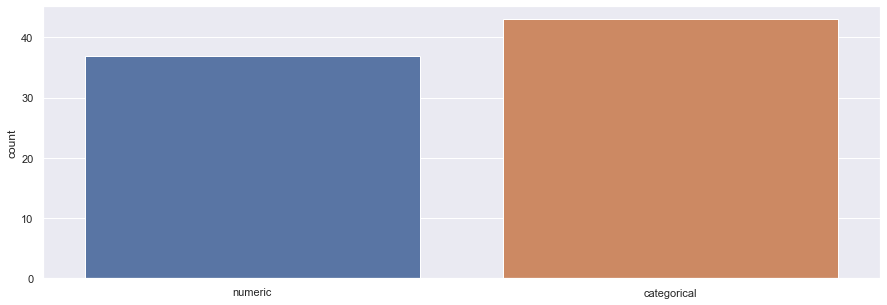

In [4]:
column_data_type = []
for col in data.columns:
    data_type = data[col].dtype
    if data[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(15,5))
sns.countplot(x=column_data_type)
plt.show()

In [5]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(data)
missing_values_data


,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,2909,99.657417
1,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
3,Fence,2348,80.438506
4,FireplaceQu,1420,48.646797
5,LotFrontage,486,16.649538
6,GarageFinish,159,5.447071
7,GarageQual,159,5.447071
8,GarageCond,159,5.447071
9,GarageYrBlt,159,5.447071


# Filling NAN Values

In [6]:
data['BsmtFinSF1'].fillna(0, inplace=True)
data['BsmtFinSF2'].fillna(0, inplace=True)
data['TotalBsmtSF'].fillna(0, inplace=True)
data['BsmtUnfSF'].fillna(0, inplace=True)
data['Electrical'].fillna('FuseA',inplace = True)
data['KitchenQual'].fillna('TA',inplace=True)
data['LotFrontage'].fillna(data.groupby('1stFlrSF')['LotFrontage'].transform('mean'),inplace=True)
data['LotFrontage'].interpolate(method='linear',inplace=True)
data['MasVnrArea'].fillna(data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace=True)
data['MasVnrArea'].interpolate(method='linear',inplace=True)

In [7]:
for col in NAN_col:
    data_type = data[col].dtype
    if data_type == 'object':
        data[col].fillna('NA',inplace=True)
    else:
        data[col].fillna(data[col].mean(),inplace=True)

## Adding New Features

In [8]:
data['Total_Square_Feet'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + 
                                                                 data['2ndFlrSF'] + data['TotalBsmtSF'])

data['Total_Bath'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + 
                                                                  (0.5 * data['BsmtHalfBath']))

data['Total_Porch_Area'] = (data['OpenPorchSF'] + data['3SsnPorch'] + 
                                                data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])

data['SqFtPerRoom'] = data['GrLivArea'] / (data['TotRmsAbvGrd'] + data['FullBath'] +
                                                       data['HalfBath'] + data['KitchenAbvGr'])


# One Hot Encoding for Categorical Features

In [9]:
data = pd.get_dummies(data)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


# Splitting train and test data

In [10]:
train = data[:1460].copy()
test = data[1460:].copy()
train['SalePrice'] = y
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,0,0,0,0,1,0,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,0,0,0,0,1,0,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,0,0,0,0,1,0,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,1,0,0,0,0,0,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,0,0,0,0,1,0,250000


# Extracting Top Features

<AxesSubplot:>

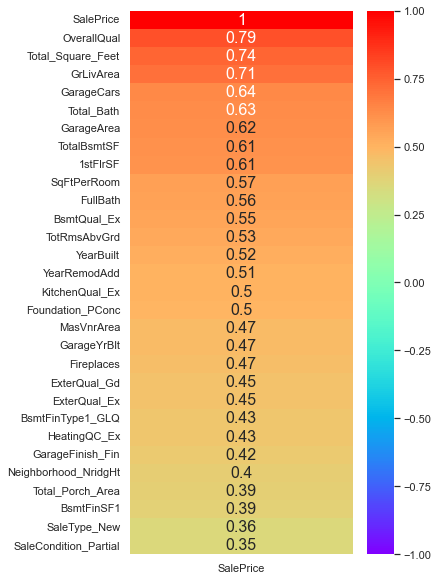

In [11]:
top_features = train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

## Now that we have extracted the top features that influnces the SalePrice we would see their distribution to find outliers.

In [12]:
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.countplot(train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.distplot(train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    
print('Plot Function is ready to use')

Plot Function is ready to use


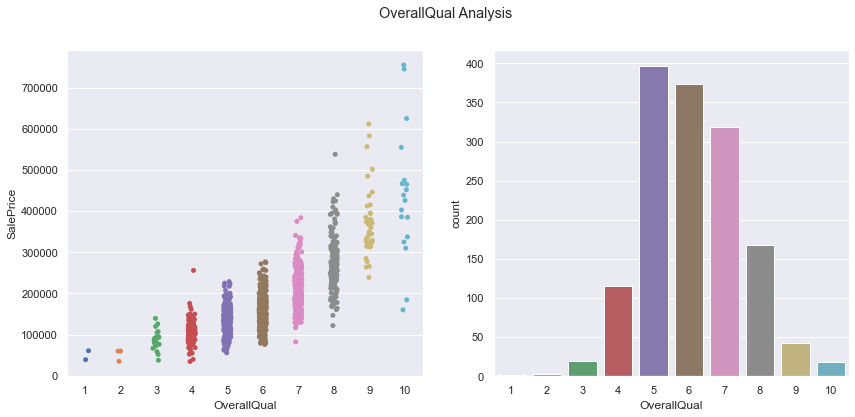

In [13]:
plot_data('OverallQual',True)

### We see there are two outliers with 10 overall quality and price less than 200000.

In [14]:
train = train.drop(train[(train['OverallQual'] == 10) & (train['SalePrice'] < 200000)].index)

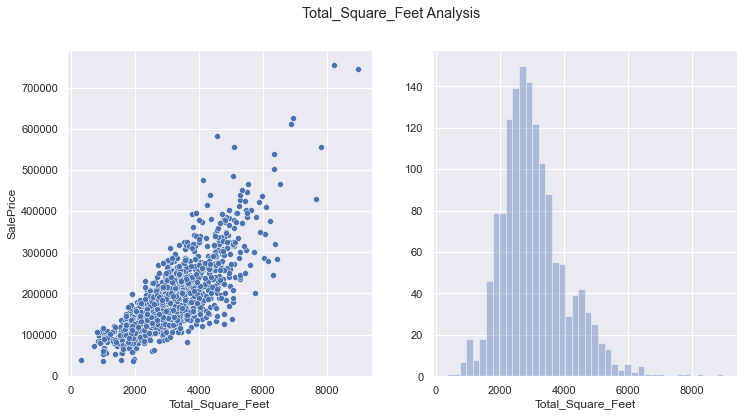

In [15]:
plot_data('Total_Square_Feet')

## This seems more or less appropriate distribution with no outliers whatsoever.

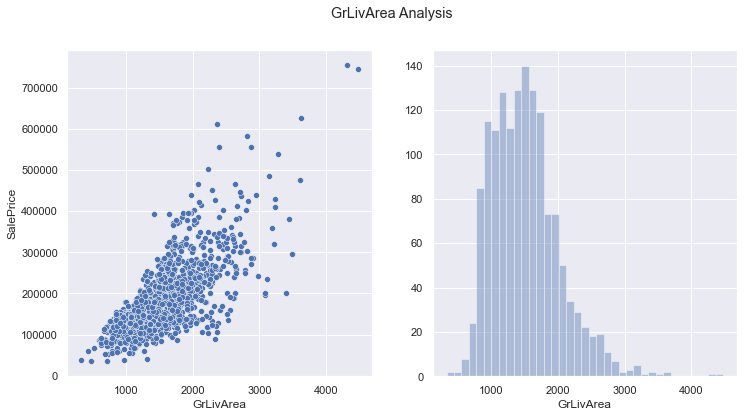

In [16]:
plot_data('GrLivArea')

## Again no outliers that can be eliminated.

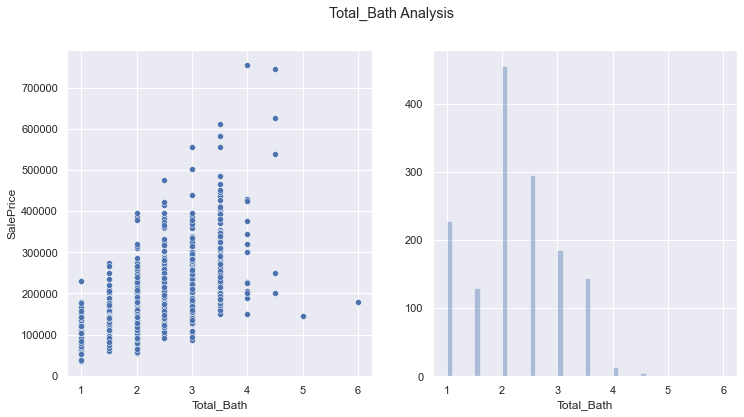

In [17]:
plot_data('Total_Bath')

## Here we clearly see two outliers that have Total_Bath more than 4 but with sale price less than 200000.

In [18]:
train = train.drop(train[(train['Total_Bath'] > 4) & (train['SalePrice'] < 200000)].index)

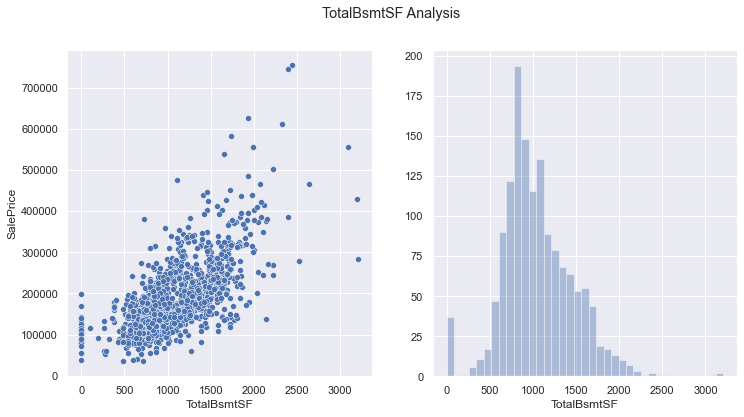

In [19]:
plot_data('TotalBsmtSF')

## Her as well we see 1 clear outlier that has TotalBsmtSF more than 3000 but sale price less than 300000.

In [20]:
train = train.drop(train[(train['TotalBsmtSF'] > 3000) & (train['SalePrice'] < 400000)].index)

## After resetting the index,this is the final train data that we get

In [21]:
train.reset_index()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,1,0,0,0,0,1,0,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,1,0,0,0,0,1,0,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,1,0,0,0,0,1,0,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,1,1,0,0,0,0,0,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,...,0,0,1,0,0,0,0,1,0,175000
1451,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,...,0,0,1,0,0,0,0,1,0,210000
1452,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,...,0,0,1,0,0,0,0,1,0,266500
1453,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,...,0,0,1,0,0,0,0,1,0,142125


## Outlier elimination through Isolation Forest!!
### We use this algorithm since it would be difficult to go through all the features and eliminate the outliers manually but it was important to do it for the features that have higher correlation with the SalePrice

In [22]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 18
Number of rows without outliers: 1437


## Scaling the features using Sklearn Standard Scalar

In [23]:
X = train.copy()
X.drop(['SalePrice'],axis=1,inplace=True)
y = train['SalePrice'].values
X.shape,y.shape

((1437, 314), (1437,))

In [24]:
scale = StandardScaler()
X = scale.fit_transform(X)

# MODELLING


### We would use Random Algorithm from keras for hyper-parameter tuning of the model.

In [25]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [ ]:
# tuner.search(X[1100:],y[1100:],batch_size=128,epochs=200,validation_data=validation_data=(X[:1100],y[:1100]))
# model = tuner.get_best_models(1)[0]

# After implementing this and tuning further we get the below model that I have implemented separately.Won't be running this here.

In [27]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mse')
    return model

In [28]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               100800    
                                                                 
 dense_1 (Dense)             (None, 384)               123264    
                                                                 
 dense_2 (Dense)             (None, 352)               135520    
                                                                 
 dense_3 (Dense)             (None, 448)               158144    
                                                                 
 dense_4 (Dense)             (None, 160)               71840     
                                                                 
 dense_5 (Dense)             (None, 160)               25760     
                                                                 
 dense_6 (Dense)             (None, 32)                5

## We would be using early stopping callback and would use 1/10th of the training data as validation to estimate the optimum number of epochs that would prevent overfitting

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X,y=y,
          validation_split=0.1,
          batch_size=128,epochs=1000, callbacks=[early_stop])

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 39559884800.0000 - val_loss: 37117280256.0000
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 39559159808.0000 - val_loss: 37116145664.0000
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 39557365760.0000 - val_loss: 37113159680.0000
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 39552389120.0000 - val_loss: 37104975872.0000
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 39538864128.0000 - val_loss: 37082890240.0000
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 39501869056.0000 - val_loss: 37023105024.0000
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 39403388928.0000 - val_loss: 36869263360.0000
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 39153303552.0000 - val_loss: 36499419136.0000
Epoch 9/1000
11/11 [===================

11/11 [==============================] - 0s 3ms/step - loss: 281503232.0000 - val_loss: 608114240.0000
Epoch 71/1000
11/11 [==============================] - 0s 3ms/step - loss: 277642240.0000 - val_loss: 606375808.0000
Epoch 72/1000
11/11 [==============================] - 0s 3ms/step - loss: 273336704.0000 - val_loss: 606641792.0000
Epoch 73/1000
11/11 [==============================] - 0s 3ms/step - loss: 270287904.0000 - val_loss: 607545664.0000
Epoch 74/1000
11/11 [==============================] - 0s 3ms/step - loss: 267636208.0000 - val_loss: 604978304.0000
Epoch 75/1000
11/11 [==============================] - 0s 3ms/step - loss: 264023872.0000 - val_loss: 601679872.0000
Epoch 76/1000
11/11 [==============================] - 0s 3ms/step - loss: 263111280.0000 - val_loss: 593528320.0000
Epoch 77/1000
11/11 [==============================] - 0s 3ms/step - loss: 257158064.0000 - val_loss: 588961536.0000
Epoch 78/1000
11/11 [==============================] - 0s 3ms/step - loss: 253

Epoch 140/1000
11/11 [==============================] - 0s 3ms/step - loss: 146020384.0000 - val_loss: 518179392.0000
Epoch 141/1000
11/11 [==============================] - 0s 3ms/step - loss: 143832464.0000 - val_loss: 512417408.0000
Epoch 142/1000
11/11 [==============================] - 0s 3ms/step - loss: 142370400.0000 - val_loss: 514056576.0000
Epoch 143/1000
11/11 [==============================] - 0s 4ms/step - loss: 141333136.0000 - val_loss: 505059712.0000
Epoch 144/1000
11/11 [==============================] - 0s 3ms/step - loss: 140946624.0000 - val_loss: 509745728.0000
Epoch 145/1000
11/11 [==============================] - 0s 3ms/step - loss: 139896928.0000 - val_loss: 509906560.0000
Epoch 146/1000
11/11 [==============================] - 0s 3ms/step - loss: 138037472.0000 - val_loss: 509401248.0000
Epoch 147/1000
11/11 [==============================] - 0s 4ms/step - loss: 137188912.0000 - val_loss: 506938720.0000
Epoch 148/1000
11/11 [==============================] - 

11/11 [==============================] - 0s 4ms/step - loss: 91852864.0000 - val_loss: 482148640.0000
Epoch 210/1000
11/11 [==============================] - 0s 4ms/step - loss: 90577136.0000 - val_loss: 489270400.0000
Epoch 211/1000
11/11 [==============================] - 0s 4ms/step - loss: 89560272.0000 - val_loss: 471525728.0000
Epoch 212/1000
11/11 [==============================] - 0s 4ms/step - loss: 88490480.0000 - val_loss: 473364256.0000
Epoch 213/1000
11/11 [==============================] - 0s 4ms/step - loss: 87717776.0000 - val_loss: 471973792.0000
Epoch 214/1000
11/11 [==============================] - 0s 4ms/step - loss: 87805136.0000 - val_loss: 480577408.0000
Epoch 215/1000
11/11 [==============================] - 0s 4ms/step - loss: 87372384.0000 - val_loss: 471331456.0000
Epoch 216/1000
11/11 [==============================] - 0s 4ms/step - loss: 86166112.0000 - val_loss: 479867328.0000
Epoch 217/1000
11/11 [==============================] - 0s 4ms/step - loss: 859

<AxesSubplot:>

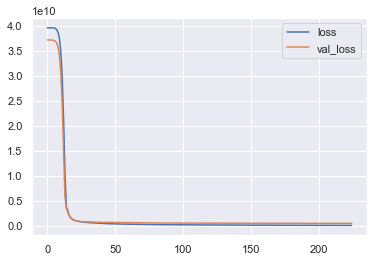

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [31]:
model = create_model() # Resetting the model.

## Training the model with full training data and optimum number of epochs!!

In [32]:
history = model.fit(x=X,y=y,
          batch_size=128,epochs=170)

Epoch 1/170
12/12 [==============================] - 0s 2ms/step - loss: 39315288064.0000
Epoch 2/170
12/12 [==============================] - 0s 2ms/step - loss: 39314898944.0000
Epoch 3/170
12/12 [==============================] - 0s 2ms/step - loss: 39313731584.0000
Epoch 4/170
12/12 [==============================] - 0s 2ms/step - loss: 39309996032.0000
Epoch 5/170
12/12 [==============================] - 0s 2ms/step - loss: 39298564096.0000
Epoch 6/170
12/12 [==============================] - 0s 2ms/step - loss: 39263178752.0000
Epoch 7/170
12/12 [==============================] - 0s 2ms/step - loss: 39163625472.0000
Epoch 8/170
12/12 [==============================] - 0s 2ms/step - loss: 38907969536.0000
Epoch 9/170
12/12 [==============================] - 0s 2ms/step - loss: 38258786304.0000
Epoch 10/170
12/12 [==============================] - 0s 2ms/step - loss: 36805857280.0000
Epoch 11/170
12/12 [==============================] - 0s 2ms/step - loss: 33716807680.0000
Epoch 12

12/12 [==============================] - 0s 2ms/step - loss: 216961392.0000
Epoch 93/170
12/12 [==============================] - 0s 2ms/step - loss: 216120192.0000
Epoch 94/170
12/12 [==============================] - 0s 2ms/step - loss: 212526176.0000
Epoch 95/170
12/12 [==============================] - 0s 2ms/step - loss: 211302560.0000
Epoch 96/170
12/12 [==============================] - 0s 2ms/step - loss: 208944640.0000
Epoch 97/170
12/12 [==============================] - 0s 2ms/step - loss: 207106240.0000
Epoch 98/170
12/12 [==============================] - 0s 2ms/step - loss: 205936912.0000
Epoch 99/170
12/12 [==============================] - 0s 2ms/step - loss: 204294336.0000
Epoch 100/170
12/12 [==============================] - 0s 2ms/step - loss: 201737872.0000
Epoch 101/170
12/12 [==============================] - 0s 2ms/step - loss: 200286592.0000
Epoch 102/170
12/12 [==============================] - 0s 2ms/step - loss: 196975056.0000
Epoch 103/170
12/12 [==========

<AxesSubplot:>

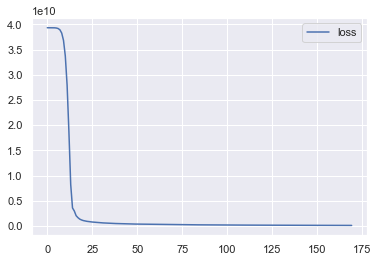

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Prediction & Evaluation

In [34]:
model.evaluate(X,y)

45/45 [==============================] - 0s 2ms/step - loss: 118224040.0000


118224040.0

In [35]:
X_test = scale.transform(test)
result = model.predict(X_test)
result = pd.DataFrame(result,columns=['SalePrice'])
result.head()
result['Id'] = test['Id']
result = result[['Id','SalePrice']]
result.head()

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,132244.375000
1,1462,157006.843750
2,1463,189699.031250
3,1464,188532.921875
4,1465,184012.265625


In [36]:
result.to_csv('submission.csv',index=False)

## Note: I would just like to say that Keras is not the most suitable model for this problem since the dataset given in this problem is not sufficient!!